In [30]:
import mysql.connector 
from mysql.connector import errorcode
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
from time import sleep
from random import randint
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
DB_NAME = 'movies'

cnx = mysql.connector.connect(
    host = "ms-proj-db.ckhgdgqfsqpw.us-east-2.rds.amazonaws.com",
    user = "admin",
    passwd = "12345678",
    database = DB_NAME
)
cursor = cnx.cursor(buffered=True)

In [25]:
cursor.execute("""
SELECT *
FROM movies.budget
;
""")
budget_df = pd.DataFrame(cursor.fetchall())
budget_df.columns = [x[0] for x in cursor.description]
budget_df.set_index(keys = 'Lifetime_Gross_Rank', inplace = True)
budget_df

,Movie_Title,Lifetime_Gross,Movie_Year,URL
Lifetime_Gross_Rank,,,,
1.0,Avengers: Endgame,2.797800e+09,2019.0,https://www.boxofficemojo.com/title/tt4154796/...
2.0,Avatar,2.790440e+09,2009.0,https://www.boxofficemojo.com/title/tt0499549/...
3.0,Titanic,2.194440e+09,1997.0,https://www.boxofficemojo.com/title/tt0120338/...
4.0,Star Wars: Episode VII - The Force Awakens,2.068220e+09,2015.0,https://www.boxofficemojo.com/title/tt2488496/...
5.0,Avengers: Infinity War,2.048360e+09,2018.0,https://www.boxofficemojo.com/title/tt4154756/...
...,...,...,...,...
596.0,Halloween,2.554850e+08,2018.0,https://www.boxofficemojo.com/title/tt1502407/...
597.0,Get Out,2.554140e+08,2017.0,https://www.boxofficemojo.com/title/tt5052448/...
598.0,Us,2.551060e+08,2019.0,https://www.boxofficemojo.com/title/tt6857112/...


In [29]:
cursor.execute("""
SELECT *
FROM movies.summary
;
""")
summary_df = pd.DataFrame(cursor.fetchall())
summary_df.columns = [x[0] for x in cursor.description]
summary_df.set_index(keys = 'Lifetime_Gross_Rank', inplace = True)
summary_df

,Movie_Title,Lifetime_Gross,Domestic_Distributor,Budget,MPAA,Running_Time_Minutes,Genres
Lifetime_Gross_Rank,,,,,,,
1.0,Avengers: Endgame,2.797800e+09,Walt Disney Studios Motion Pictures,356000000.0,PG-13,181.0,Action Adventure Drama Sci-Fi
2.0,Avatar,2.790440e+09,Twentieth Century Fox,237000000.0,PG-13,162.0,Action Adventure Fantasy Sci-Fi
3.0,Titanic,2.194440e+09,Paramount Pictures,200000000.0,PG-13,194.0,Drama Romance
4.0,Star Wars: Episode VII - The Force Awakens,2.068220e+09,Walt Disney Studios Motion Pictures,245000000.0,PG-13,138.0,Action Adventure Sci-Fi
5.0,Avengers: Infinity War,2.048360e+09,Walt Disney Studios Motion Pictures,NaN,PG-13,149.0,Action Adventure Sci-Fi
...,...,...,...,...,...,...,...
596.0,Halloween,2.554850e+08,Universal Pictures,10000000.0,R,106.0,Horror Thriller
597.0,Get Out,2.554140e+08,Universal Pictures,4500000.0,R,104.0,Horror Mystery Thriller
598.0,Us,2.551060e+08,Universal Pictures,20000000.0,R,116.0,Horror Mystery Thriller


<BarContainer object of 10 artists>

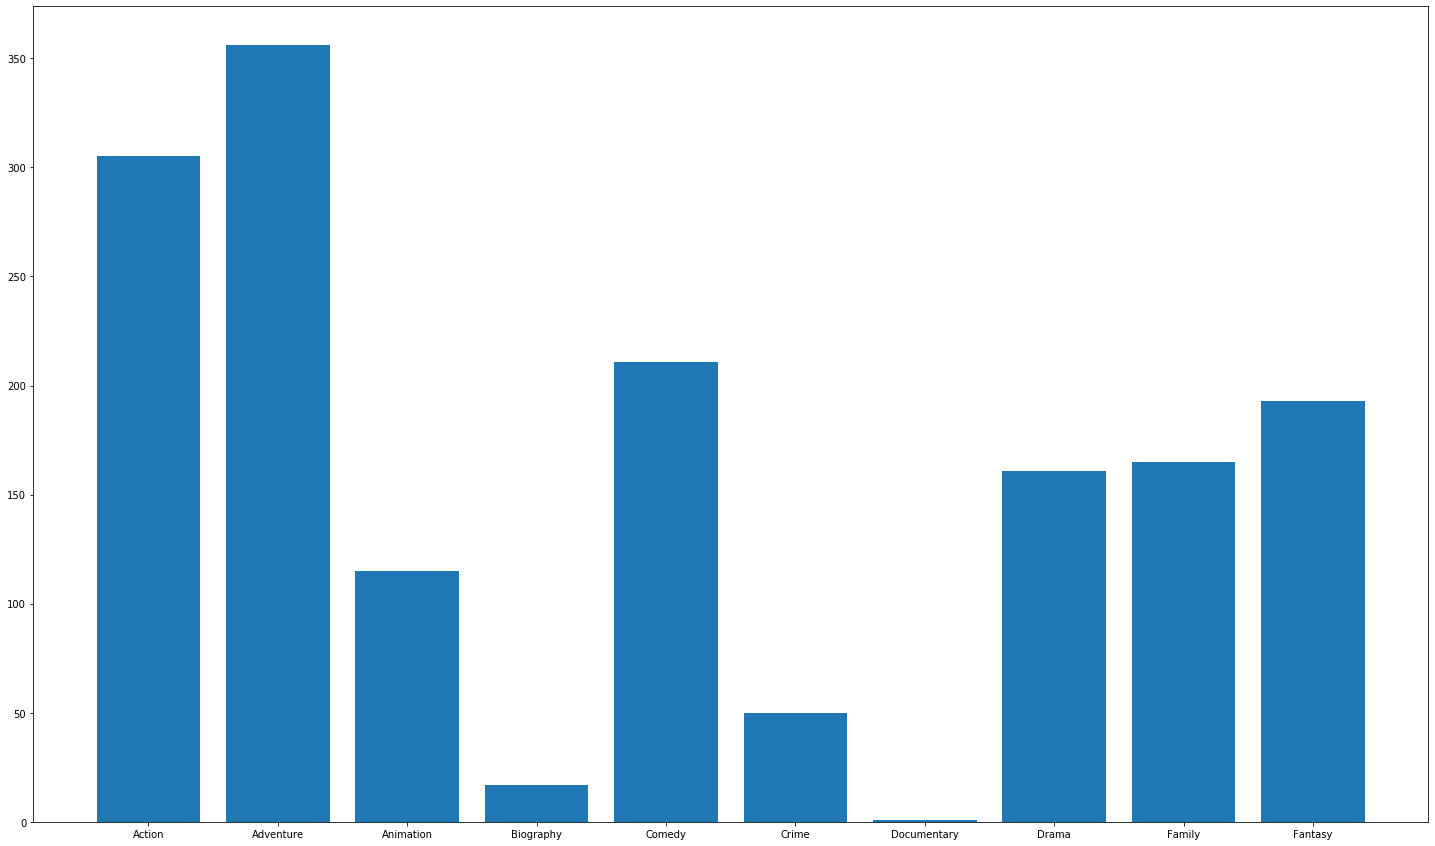

In [88]:
Genres_list = summary_df['Genres'].tolist()
new_genres_list = []
for genre in Genres_list:
    genre_2 = []
    genre_2.extend(genre.split(' '))
    new_genres_list.extend(genre_2)
new_genres_array = np.array(new_genres_list)
unique_elements, counts_elements = np.unique(new_genres_array, return_counts=True)
genres_dict = {}
unique_elements = list(unique_elements)[:10]
counts_elements = list(counts_elements)[:10]
plt.figure(figsize = (25, 15))
plt.bar(unique_elements, counts_elements)

['Action Adventure Drama Sci-Fi',
 'Action Adventure Fantasy Sci-Fi',
 'Drama Romance',
 'Action Adventure Sci-Fi',
 'Action Adventure Sci-Fi',
 'Action Adventure Sci-Fi',
 'Adventure Animation Drama Family Musical',
 'Action Adventure Sci-Fi',
 'Action Adventure Thriller',
 'Adventure Animation Comedy Family Fantasy Musical',
 'Action Adventure Sci-Fi',
 'Action Adventure Sci-Fi',
 'Adventure Drama Fantasy Mystery',
 'Action Adventure Fantasy Sci-Fi',
 'Action Adventure Sci-Fi',
 'Adventure Animation Comedy Family Fantasy Musical',
 'Family Fantasy Musical Romance',
 'Action Adventure Animation Comedy Family Sci-Fi',
 'Action Adventure Thriller',
 'Action Adventure Sci-Fi',
 'Adventure Animation Comedy Family Sci-Fi',
 'Action Adventure Sci-Fi',
 'Action Adventure Fantasy Sci-Fi',
 'Adventure Drama Fantasy',
 'Action Adventure Sci-Fi',
 'Action Adventure Sci-Fi',
 'Action Adventure Sci-Fi',
 'Action Adventure Thriller',
 'Action Adventure Sci-Fi',
 'Action Adventure Fantasy Thriller',

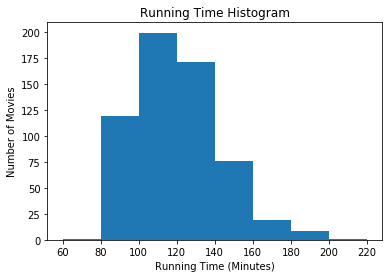

In [37]:
bins = [60,80,100,120,140,160,180,200,220]
summary_df['Running_Time_Minutes'].plot(kind = 'hist', bins = bins)
plt.title('Running Time Histogram')
plt.xlabel('Running Time (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

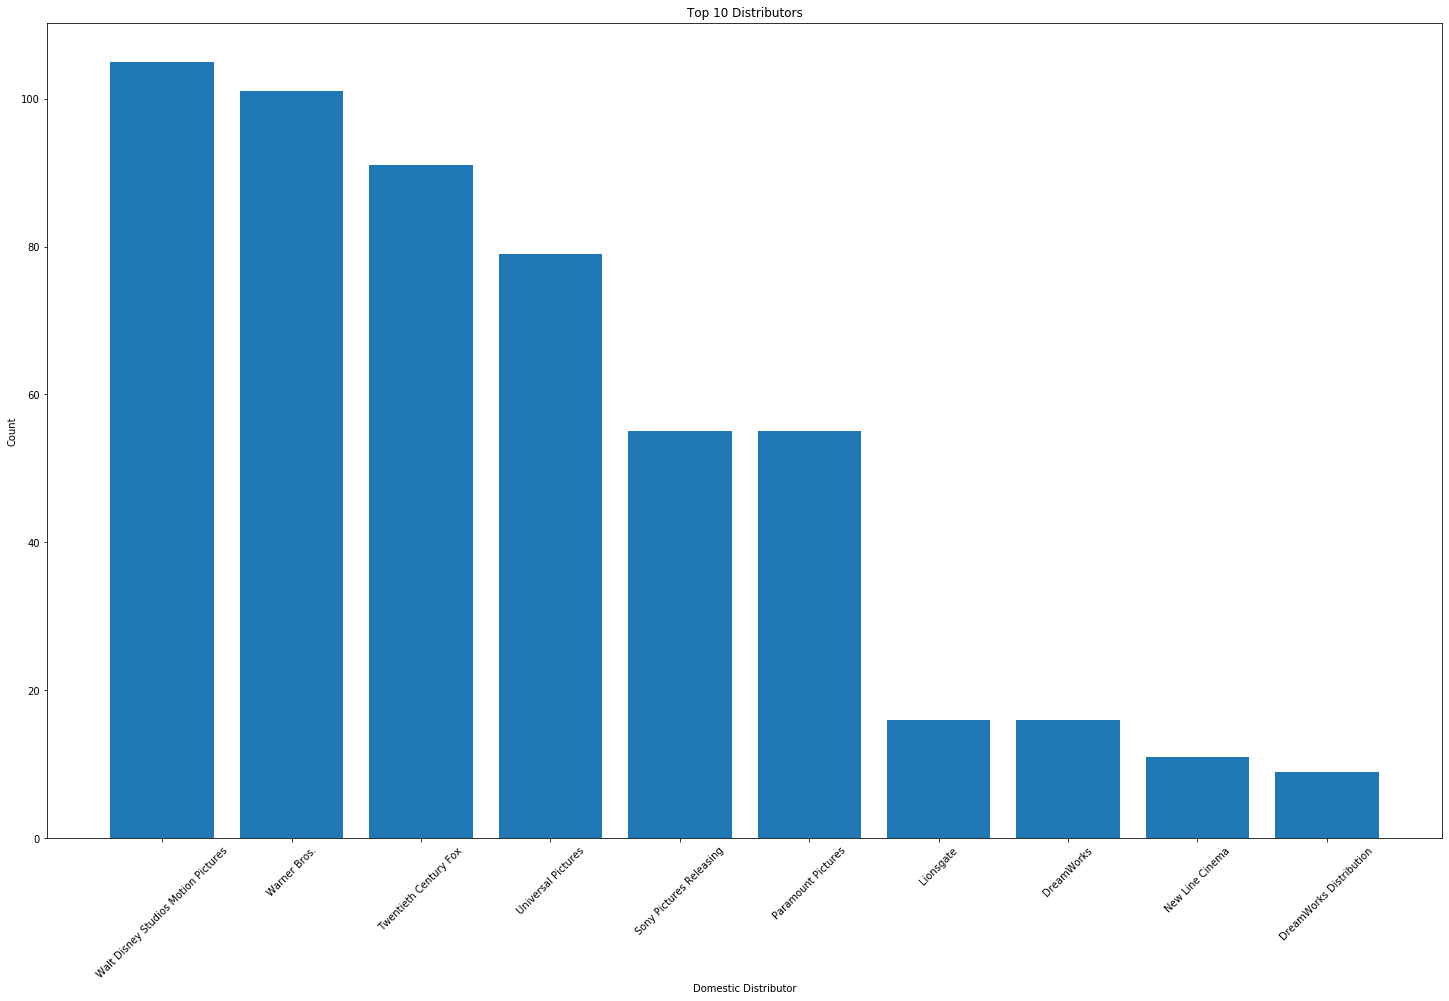

In [68]:
Studios_dict = dict(summary_df['Domestic_Distributor'].value_counts()[0:10])
Studio_names = Studios_dict.keys()
Studio_counts = Studios_dict.values()
plt.figure(figsize = (25, 15))
plt.bar(Studio_names, Studio_counts)
plt.title('Top 10 Distributors')
plt.xlabel('Domestic Distributor')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

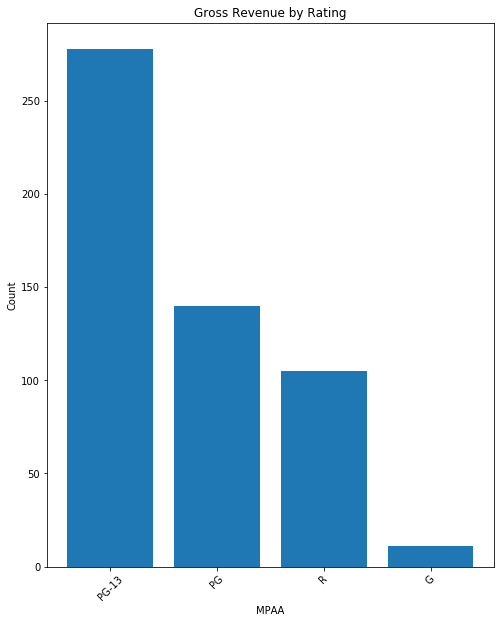

In [71]:
MPAA_dict = dict(summary_df['MPAA'].value_counts())
MPAA_names = MPAA_dict.keys()
MPAA_counts = MPAA_dict.values()
plt.figure(figsize = (8, 10))
plt.bar(MPAA_names, MPAA_counts)
plt.title('Gross Revenue by Rating')
plt.xlabel('MPAA')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
Studio